# PyNBRefactor

---
_Refactors Jupyter Notebooks into Python Packages and Modules_

## Set Up

In [4]:
# IMPORTS

import os
import sys

sys.path.append(os.path.abspath(os.path.join('..')))  # for parent-level relative import

from processor import process_notebook


# PATHS

NOTEBOOK_PATH   = './examples/sample_HiveNAS.ipynb'
PLOTS_PATH      = './examples/plots/'
PLOTS_FORMAT    = 'pdf'


## Processing / Refactoring

In [5]:

# extract filename and infer output path from the notebook path given in 1.1 Set Up
notebook_filename = os.path.splitext(os.path.basename(NOTEBOOK_PATH))[0]  # filename w/o extension
refactored_path = f'./examples/results/{notebook_filename}_refactored/'

# REFACTOR
root_node = process_notebook(NOTEBOOK_PATH, refactored_path)




Required Imps {'sys': {'node': <_ast.Import object at 0x7fa9e16a40d0>, 'node_type': 'Import', 'module_path': 'sys', 'is_local': False, 'alias': None}} 



----['.', 'libraries'] > sys: {'node': <_ast.Import object at 0x7fa9e16a40d0>, 'node_type': 'Import', 'module_path': 'sys', 'is_local': False, 'alias': None}----


Required Imps {'sys': {'node': <_ast.Import object at 0x7fa9e16a40d0>, 'node_type': 'Import', 'module_path': 'sys', 'is_local': False, 'alias': None}} 



----['.', 'libraries'] > sys: {'node': <_ast.Import object at 0x7fa9e16a40d0>, 'node_type': 'Import', 'module_path': 'sys', 'is_local': False, 'alias': None}----

Used names for ..libraries={'sys'}, dependencies={'import sys'}


Required Imps {'GPU': {'node': <_ast.Import object at 0x7fa9e16b5d50>, 'node_type': 'Import', 'module_path': 'GPUtil', 'is_local': False, 'alias': 'GPU'}, 'test_colab_GPU_mem': {'node': <_ast.FunctionDef object at 0x7fa9e16b5b50>, 'node_type': 'ImportFrom', 'module_path': ['.', 'libraries'], 'is

IndentationError: expected an indented block (<unknown>, line 46)

## Visualizing Generated Module Tree

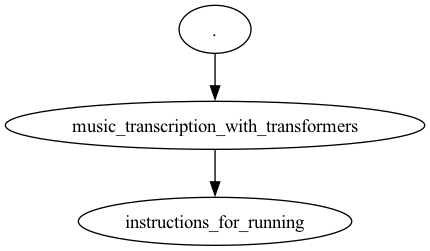

In [6]:
from visualization import plot_module_tree
from fileops import ensure_dir

from IPython.display import display, Image

# ensure existence of the output path
ensure_dir(PLOTS_PATH)
plot_file_path = os.path.join(PLOTS_PATH, notebook_filename)

# init the modules DAG
dag = plot_module_tree(root_node, format=PLOTS_FORMAT)

# render to file
dag.render(plot_file_path, cleanup=True)

# render to IPython Display
img_data = dag.pipe(format='png')
display(Image(img_data))

In [15]:
text = ' '
if len(text.strip()):
    print('true')